In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image
#import graphviz

In [18]:
df=pd.read_csv('bank-marketing.csv', sep=';')

In [12]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


In [13]:
df.tail()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
41183,"73;""retired"";""married"";""professional.course"";""..."
41184,"46;""blue-collar"";""married"";""professional.cours..."
41185,"56;""retired"";""married"";""university.degree"";""no..."
41186,"44;""technician"";""married"";""professional.course..."
41187,"74;""retired"";""married"";""professional.course"";""..."


In [19]:
df = pd.get_dummies(df,columns=['job'],drop_first=True)
df.head()

,age,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,56,married,basic.4y,no,no,no,telephone,may,mon,261,...,False,True,False,False,False,False,False,False,False,False
1,57,married,high.school,unknown,no,no,telephone,may,mon,149,...,False,False,False,False,False,True,False,False,False,False
2,37,married,high.school,no,yes,no,telephone,may,mon,226,...,False,False,False,False,False,True,False,False,False,False
3,40,married,basic.6y,no,no,no,telephone,may,mon,151,...,False,False,False,False,False,False,False,False,False,False
4,56,married,high.school,no,no,yes,telephone,may,mon,307,...,False,False,False,False,False,True,False,False,False,False


In [20]:
df['default'] = df['default'].map({'no':0,'yes':1,'unknown':0})
df['y'] = df['y'].map({'no':0,'yes':1})

In [21]:
# Split the data into features (X) and target (y)
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_pred = model.predict(X_test)

In [27]:


print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1_Score:",metrics.f1_score(y_test,y_pred))
print("\nClassification Report:\n",metrics.classification_report(y_test,y_pred))


Accuracy: 0.9189123573682932
Precision: 0.6725925925925926
Recall: 0.5038845726970034
F1_Score: 0.5761421319796954

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96      7337
           1       0.67      0.50      0.58       901

    accuracy                           0.92      8238
   macro avg       0.81      0.74      0.77      8238
weighted avg       0.91      0.92      0.91      8238



Confusion Matrix:


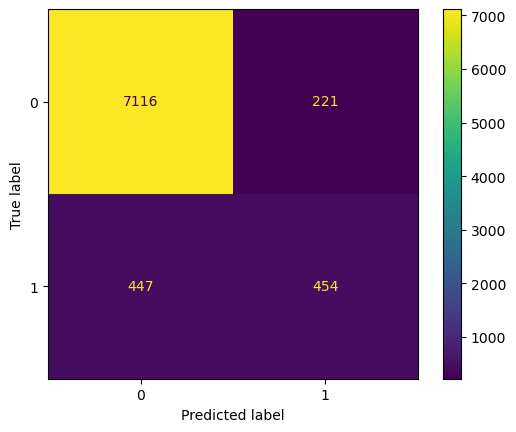

In [28]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [37]:
from sklearn.tree import plot_tree

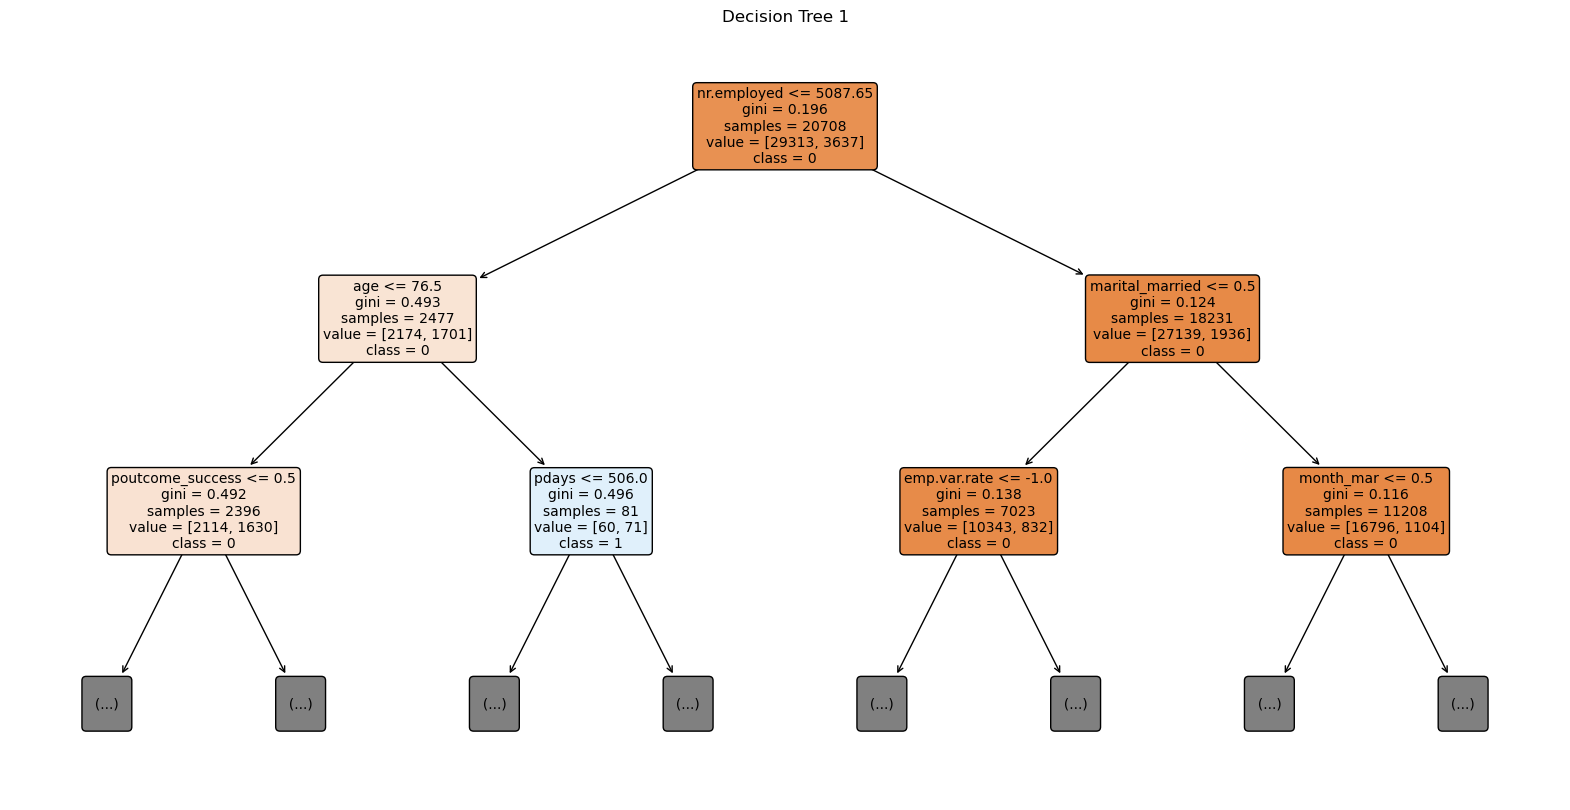

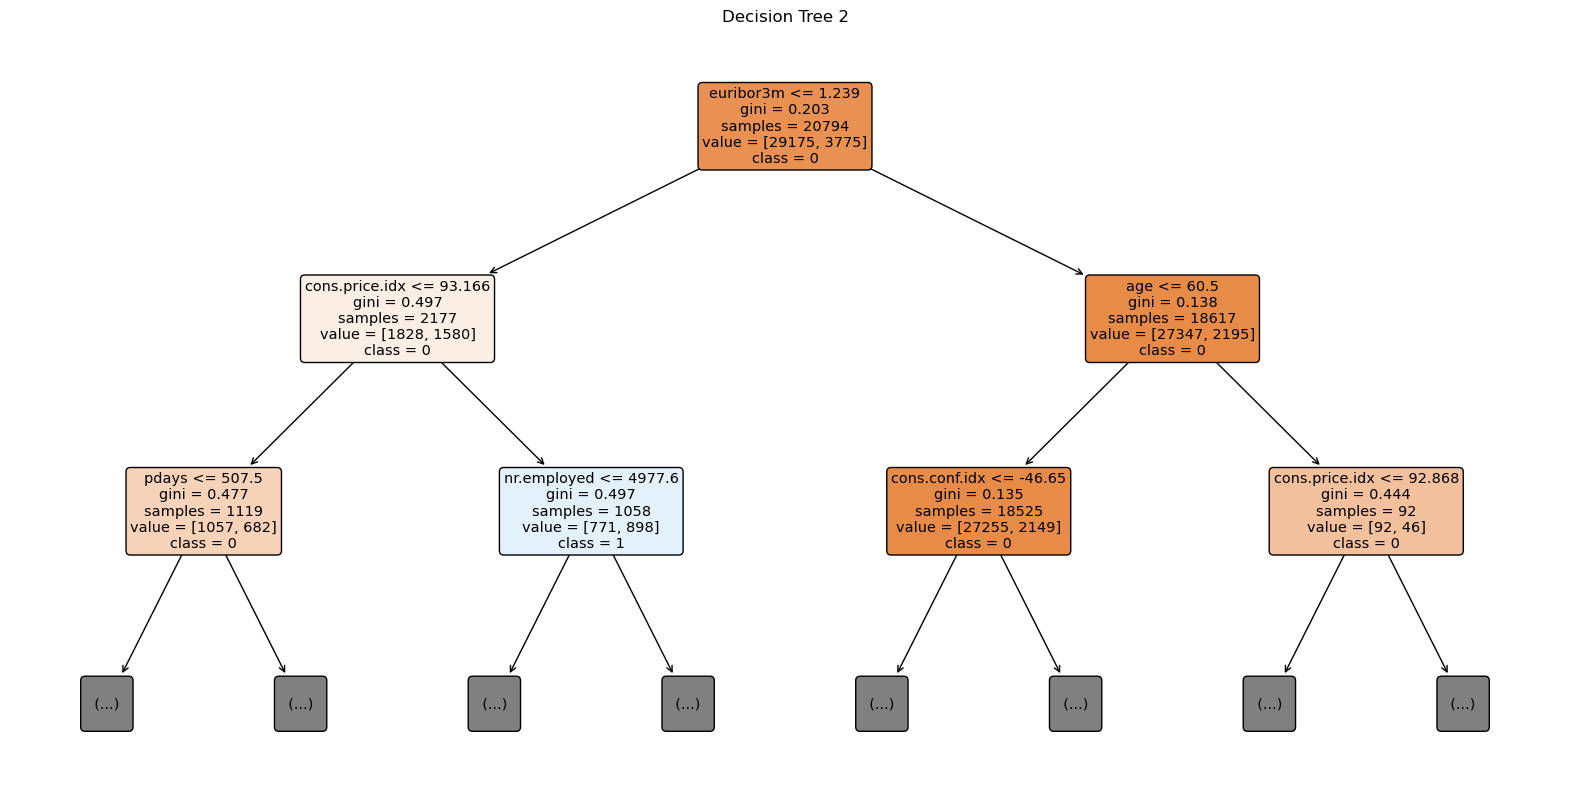

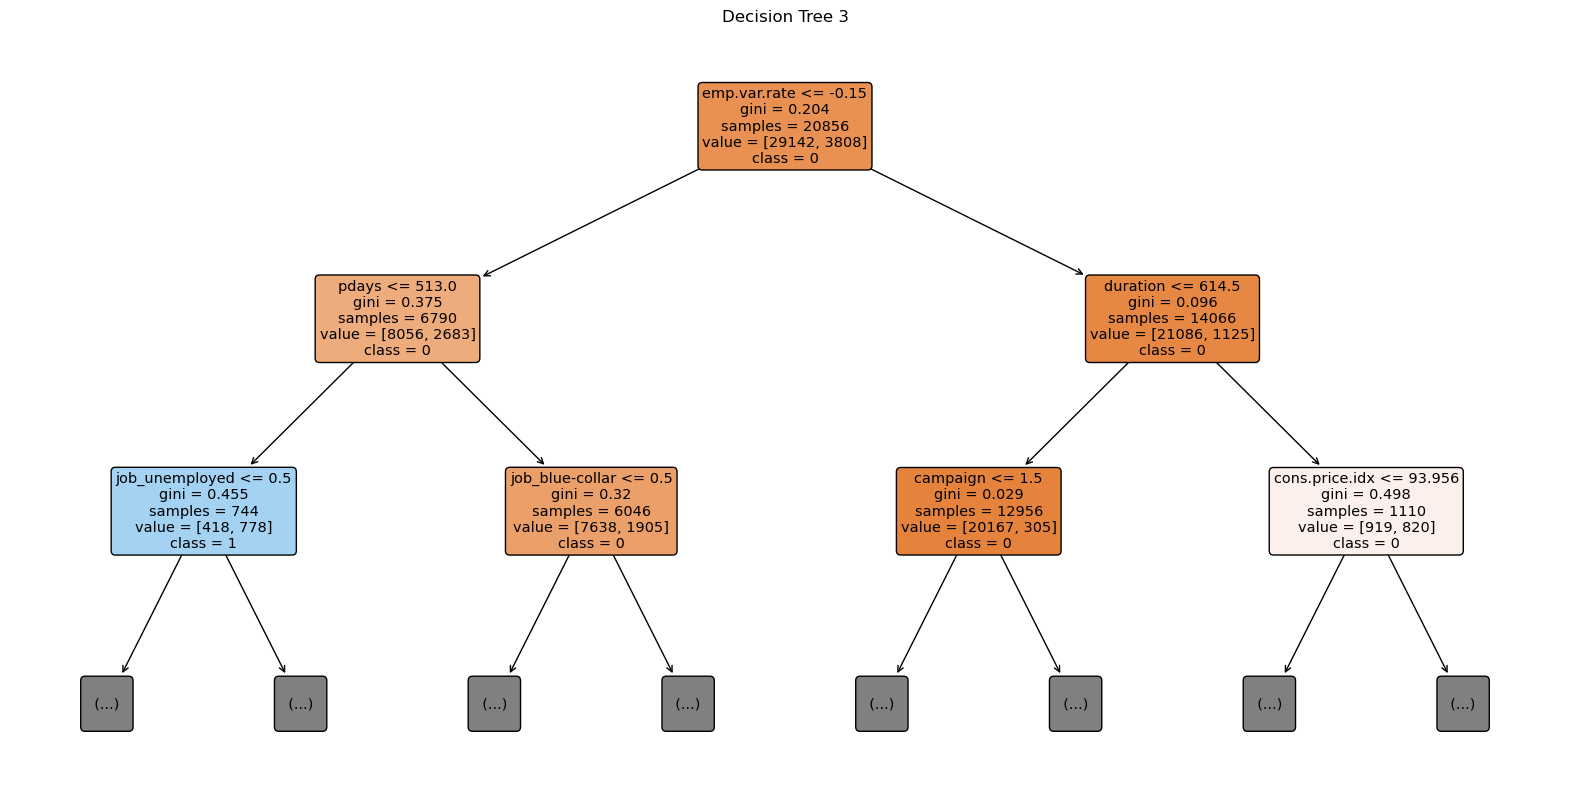

In [ ]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.figure(figsize=(20, 10))
    plot_tree(
        model.estimators_[i],
        feature_names=X_train.columns.tolist(),   # convert Index to list
        class_names=['0', '1'],
        filled=True,
        rounded=True,
        max_depth=2
    )
    plt.title(f"Decision Tree {i+1}")
    plt.show()
